In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
import os
from sys import platform

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from scipy import stats                                                         
import matplotlib.pyplot as plt
import scipy

 Table

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `test.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [218]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [219]:
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Ideal,F,SI1,60.2,56.0,4.36,4.41,2.64,6.163
1,1,0.51,Premium,E,SI1,61.5,58.0,5.14,5.11,3.15,7.373
2,2,1.59,Premium,G,SI1,62.1,58.0,7.45,7.43,4.62,9.305
3,3,0.70,Ideal,E,VS2,62.6,57.0,5.63,5.68,3.54,7.990
4,4,1.01,Good,E,VVS1,63.1,59.0,6.31,6.34,3.99,9.265


In [220]:
df_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,D,VS1,63.3,57.0,5.07,5.10,3.22
1,1,0.36,Ideal,D,SI1,59.5,56.0,4.63,4.68,2.77
2,2,0.70,Very Good,F,SI1,60.5,56.0,5.73,5.80,3.49
3,3,1.05,Premium,H,VS2,59.0,59.0,6.71,6.68,3.95
4,4,0.50,Premium,E,SI2,59.4,60.0,5.21,5.16,3.08


In [221]:
df_train.shape

(40455, 11)

In [222]:
df_test.shape

(13485, 10)

In [223]:
#SUBMISSION -> test

In [224]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
995,995,1.02,Fair,F,SI1,65.1,56.0,6.29,6.25,4.08,8.403


In [225]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
1006,1006,0.52,Ideal,E,SI1,62.1,57.0,5.1,5.14,3.18


# Cleaning, processing, feature selection, etc

In [226]:
# Processing is necessary, otherwise we won't be able to fit a model
# For the sake of the example, we'll just drop categorical columns

#df_train_cleaned = df_train.select_dtypes(exclude='object')
#print(df_train_cleaned.shape[0])
#df_train_cleaned

In [227]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [228]:
# how many categories are in categorical columns?
# cut: 1-5, one column, since they go by order of quality
# color: D->J, 1-7, one column, by order of quality
# clarity: IF-VVS1-VVS2-VS1-VS2-SI1-SI2-I1, one column, 1-8

df_train.cut.value_counts()

Ideal        16118
Premium      10371
Very Good     9098
Good          3671
Fair          1197
Name: cut, dtype: int64

In [229]:
# check for unique values, to see the spelling and that there is no null values

df_train.clarity.unique()

array(['SI1', 'VS2', 'VVS1', 'VVS2', 'SI2', 'VS1', 'I1', 'IF'],
      dtype=object)

In [230]:
new_dict_cut = {'Ideal': 1, 
            'Premium': 2, 
            'Very Good': 3, 
            'Good': 4, 
            'Fair': 5}

In [231]:
df_train.color.value_counts()

G    8430
E    7358
F    7169
H    6177
D    5118
I    4081
J    2122
Name: color, dtype: int64

In [232]:
new_dict_color = {'D': 1, 
            'E': 2, 
            'F': 3, 
            'G': 4, 
            'H': 5,
            'I': 6,
            'J': 7}

In [233]:
df_train.clarity.value_counts()

SI1     9771
VS2     9285
SI2     6812
VS1     6123
VVS2    3794
VVS1    2740
IF      1372
I1       558
Name: clarity, dtype: int64

In [234]:
new_dict_clar = {'IF': 1, 
            'VVS1': 2, 
            'VVS2': 3, 
            'VS1': 4, 
            'VS2': 5,
            'SI1': 6,
            'SI2': 7,
            'I1': 8}

In [235]:
# replace values with dictionary values
df_train['cut'].replace(new_dict_cut, inplace=True)
df_train['color'].replace(new_dict_color, inplace=True)
df_train['clarity'].replace(new_dict_clar, inplace=True)

df_train.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
39006,39006,0.53,1,4,6,61.8,58.0,5.16,5.19,3.20,7.135
38435,38435,2.19,3,2,7,62.4,61.0,8.23,8.31,5.16,9.802
32685,32685,0.76,1,5,6,61.4,55.0,5.82,5.90,3.60,8.023
21794,21794,1.01,5,6,8,56.1,63.0,6.70,6.65,3.74,7.759
30549,30549,0.40,1,6,1,62.2,56.0,4.75,4.71,2.94,6.957


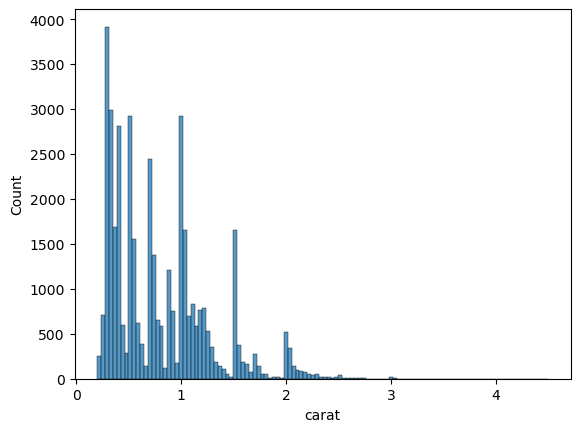

In [236]:
sns.histplot(df_train.carat);

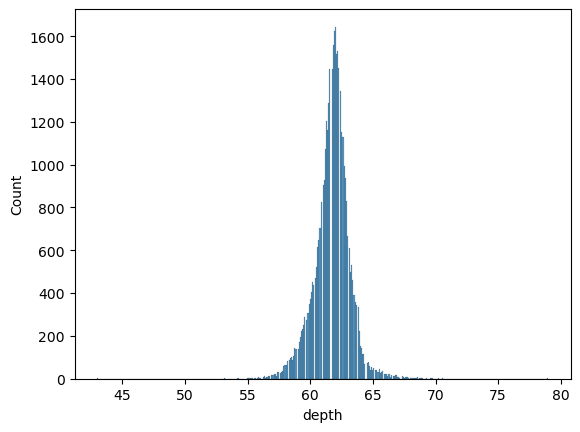

In [237]:
sns.histplot(df_train.depth);

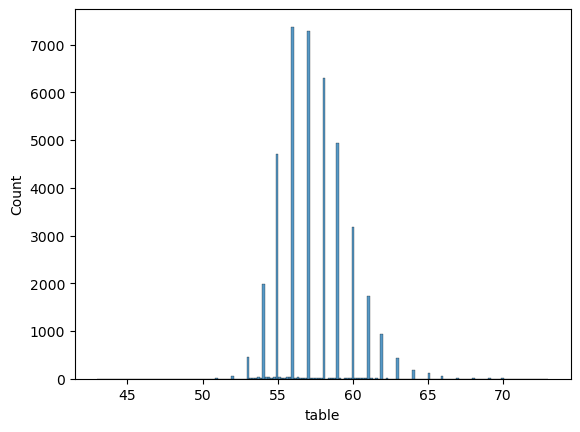

In [238]:
sns.histplot(df_train.table);

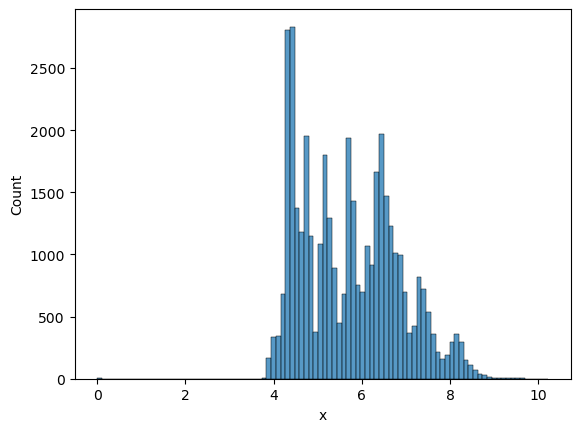

In [239]:
sns.histplot(df_train.x);

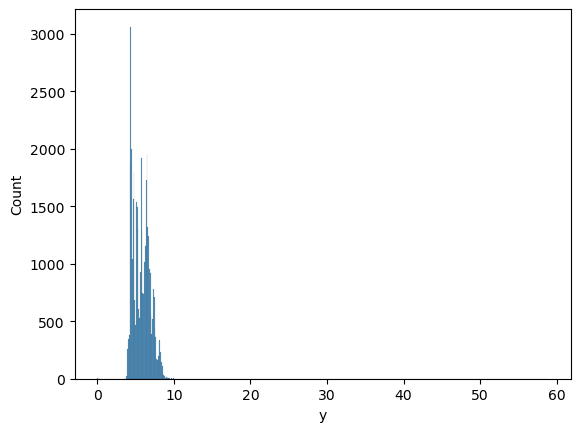

In [240]:
sns.histplot(df_train.y);

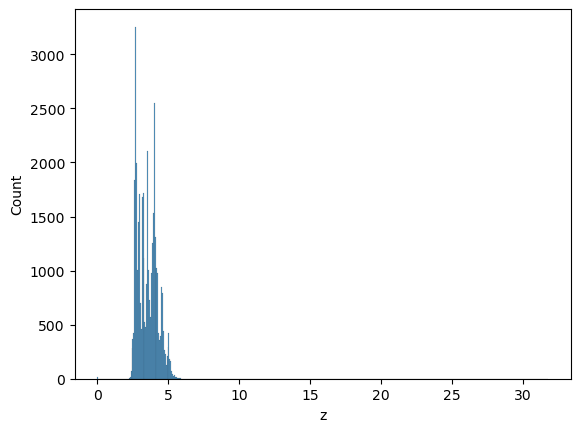

In [241]:
sns.histplot(df_train.z);

In [242]:
# data without normal distribution: depth, carat, table, x, y, z
# normalization

In [243]:
min_max_scaler = MinMaxScaler()

In [244]:
df_train['depth'] = min_max_scaler.fit_transform(df_train['depth'].values.reshape(-1, 1))
df_train['carat'] = min_max_scaler.fit_transform(df_train['carat'].values.reshape(-1, 1))
df_train['table'] = min_max_scaler.fit_transform(df_train['table'].values.reshape(-1, 1))
df_train['x'] = min_max_scaler.fit_transform(df_train['x'].values.reshape(-1, 1))
df_train['y'] = min_max_scaler.fit_transform(df_train['y'].values.reshape(-1, 1))
df_train['z'] = min_max_scaler.fit_transform(df_train['z'].values.reshape(-1, 1))

df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.023256,1,3,6,0.477778,0.433333,0.426197,0.074873,0.083019,6.163
1,1,0.072093,2,2,6,0.513889,0.500000,0.502444,0.086757,0.099057,7.373
2,2,0.323256,2,4,6,0.530556,0.500000,0.728250,0.126146,0.145283,9.305
3,3,0.116279,1,2,5,0.544444,0.466667,0.550342,0.096435,0.111321,7.990
4,4,0.188372,4,2,2,0.558333,0.533333,0.616813,0.107640,0.125472,9.265
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.069767,2,4,7,0.525000,0.500000,0.500489,0.086418,0.099371,6.914
40451,40451,0.202326,1,4,6,0.533333,0.466667,0.644184,0.111375,0.128616,8.576
40452,40452,0.283721,3,4,4,0.547222,0.400000,0.695015,0.121732,0.140881,9.346
40453,40453,0.051163,1,4,3,0.508333,0.433333,0.470186,0.081834,0.092767,6.938


# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

In [245]:
X = df_train.drop("price", axis=1) # df
y = df_train.price # serie: target, variable a predecir

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [247]:
X_test.shape

(8091, 10)

In [248]:
X_train.shape

(32364, 10)

In [249]:
y_test.shape

(8091,)

In [250]:
y_train.shape

(32364,)

In [255]:
from sklearn.tree import DecisionTreeRegressor

In [301]:
dtr = DecisionTreeRegressor(max_depth=20)

In [302]:
dtr.fit(X_train, y_train) # fit -> encontrar la ecuación / entrenando

DecisionTreeRegressor(max_depth=20)

In [303]:
y_pred = dtr.predict(X_test)

In [304]:
X_test
X_train
y_test
y_train

y_pred

array([7.373  , 8.355  , 8.69125, ..., 7.56   , 8.658  , 6.712  ])

In [305]:
y_pred = dtr.predict(X_test) # nuevos valores

In [306]:
y_pred

array([7.373  , 8.355  , 8.69125, ..., 7.56   , 8.658  , 6.712  ])

In [307]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz

In [308]:
# MAE, MSE, RMSE, R2
mae = metrics.mean_absolute_error(y_pred, y_test)
mse = metrics.mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_pred, y_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"r2: {r2}")

MAE: 0.0880856454713972
MSE: 0.016735144641625604
RMSE: 0.12936438706856537
r2: 0.9837343349448997


## Train, test split

In [191]:
#X = df_train_cleaned.iloc[:,:-1]
#y = df_train_cleaned['price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

## Fit

In [192]:
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

# Just for feedback
#if platform == "darwin":
#    os.system("say I'm done training") -- gives error?

In [193]:
#y_pred = regressor.predict(X_test)

In [194]:
#np.sqrt(mean_squared_error(y_pred, y_test))

-----
-----
-----
-----


# Applying same cleaning & processing to my `test.csv`

In [310]:
#df_test_cleaned = df_test.select_dtypes(exclude='object')
#print(df_test_cleaned.shape[0])
#df_test_cleaned.sample()

In [311]:
# replace values with dictionary values
df_test['cut'].replace(new_dict_cut, inplace=True)
df_test['color'].replace(new_dict_color, inplace=True)
df_test['clarity'].replace(new_dict_clar, inplace=True)

df_test.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z
4825,4825,0.30,1,5,3,61.9,56.0,4.28,4.31,2.65
3132,3132,1.01,2,7,5,61.0,61.0,6.28,6.22,3.81
1016,1016,0.42,3,1,4,60.6,58.0,4.87,4.90,2.96
4944,4944,0.31,1,4,6,61.6,57.0,4.32,4.35,2.67
4566,4566,0.30,1,5,4,61.5,57.0,4.27,4.31,2.64


In [312]:
df_test['depth'] = min_max_scaler.fit_transform(df_test['depth'].values.reshape(-1, 1))
df_test['carat'] = min_max_scaler.fit_transform(df_test['carat'].values.reshape(-1, 1))
df_test['table'] = min_max_scaler.fit_transform(df_test['table'].values.reshape(-1, 1))
df_test['x'] = min_max_scaler.fit_transform(df_test['x'].values.reshape(-1, 1))
df_test['y'] = min_max_scaler.fit_transform(df_test['y'].values.reshape(-1, 1))
df_test['z'] = min_max_scaler.fit_transform(df_test['z'].values.reshape(-1, 1))

df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.064449,3,1,4,0.401606,0.136364,0.472067,0.049484,0.461318
1,1,0.033264,1,1,6,0.248996,0.113636,0.431099,0.034532,0.396848
2,2,0.103950,3,3,6,0.289157,0.113636,0.533520,0.074404,0.500000
3,3,0.176715,2,5,5,0.228916,0.181818,0.624767,0.105732,0.565903
4,4,0.062370,2,2,7,0.244980,0.204545,0.485102,0.051620,0.441261
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.085239,3,5,3,0.289157,0.136364,0.513966,0.065148,0.479943
13481,13481,0.212058,2,4,5,0.341365,0.159091,0.636872,0.113920,0.608883
13482,13482,0.027027,3,1,6,0.329317,0.204545,0.410615,0.025988,0.389685
13483,13483,0.409563,1,6,6,0.285141,0.113636,0.778399,0.168031,0.726361


# Predict on the `test.csv`

In [313]:
y_pred = dtr.predict(df_test) # nuevos valores
y_pred

# Just for feedback
#if platform == "darwin":
#    os.system("say -v ayam don predictin")

array([7.405, 7.482, 7.418, ..., 6.38 , 9.542, 7.119])

In [314]:
y_pred.shape

(13485,)

# DF with two columns

In [315]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
994,994,0.089397,2,2,4,0.341365,0.204545,0.513035,0.063368,0.487106


In [318]:
df_test['price'] = y_pred # Adding the predicted price
df_for_submission = df_test[['id', 'price']] # Modifying for subnmission

In [319]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
2566,2566,7.844


In [320]:
# drop the index column, so you deliver the final csv with 2 columns only (id, price)

df_for_submission = df_for_submission.reset_index(drop=True)
df_for_submission.head(5)

,id,price
0,0,7.405
1,1,7.482
2,2,7.418
3,3,8.102
4,4,6.841


# Export (index=False)

In [321]:
df_for_submission.to_csv("my_submission_2.csv", index=False)

# Just for feedback
#if platform == "darwin":
#    os.system("say redi for submission")

In [322]:
df_for_submission.head()

,id,price
0,0,7.405
1,1,7.482
2,2,7.418
3,3,8.102
4,4,6.841
